![crack](https://cdn.radiofrance.fr/s3/cruiser-production/2021/01/1888eb1e-654a-4ab4-835b-581cf76844f7/1200x680_titanic.jpg)

# Titanic 

Let's start using classifications on a very popular dataset: **Titanic**. 

We're going to make an algorithm together that will try to predict who will survive to the titanic crash based on many variables.

Your goal will be to: 

1. Preprocess the data 
2. Create a classification algorithm 

Happy Coding!

## Step 1 - Import Data

- Import usual librairies

In [1]:
# Imports
import pandas as pd
import numpy as np # Not always necessary
import matplotlib.pyplot as plt # Not always necessary
import seaborn as sns # Not always necessary
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

- Import `titanic.csv` and visualize dataset

In [2]:
df = pd.read_csv("../99-assets/ML/titanic.csv")
print("Type de df :", type(df), df.shape)  
df.head(10)

Type de df : <class 'pandas.core.frame.DataFrame'> (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


- Remove `PassengerId`, `Name`, `Ticket`, `Cabin` columns from the dataset

In [3]:
print("Type de df :", type(df), df.shape)  
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

print("Type de df :", type(df), df.shape)  
df.head()

Type de df : <class 'pandas.core.frame.DataFrame'> (891, 12)
Type de df : <class 'pandas.core.frame.DataFrame'> (891, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Step 2 - EDA

- Visualize `Sex` and `Survived`

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

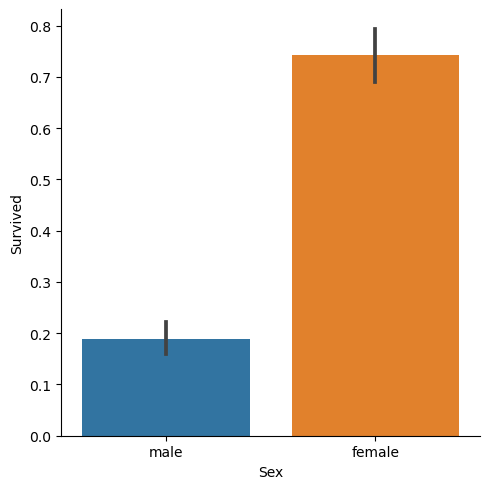

In [4]:
#df["Sex"].replace(["male", "female"], [0,1], inplace=True)


# t = 1.96
# n = len(df)
# err = t * df.std() / n**0.5
# Pour yerr voir https://pandas.pydata.org/pandas-docs/version/0.23/visualization.html#visualization-errorbars


_=sns.catplot(df, x="Sex", y="Survived", kind="bar")



- Visualize `SibSp` and `Survived`

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

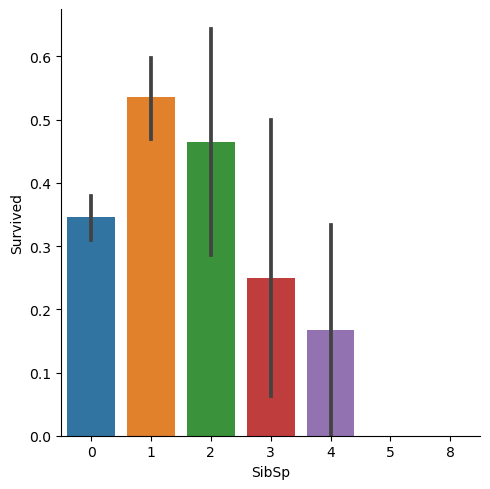

In [5]:
_ = sns.catplot(df, x="SibSp", y="Survived", kind="bar")

- Visualize `Pclass` and `Survived`

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

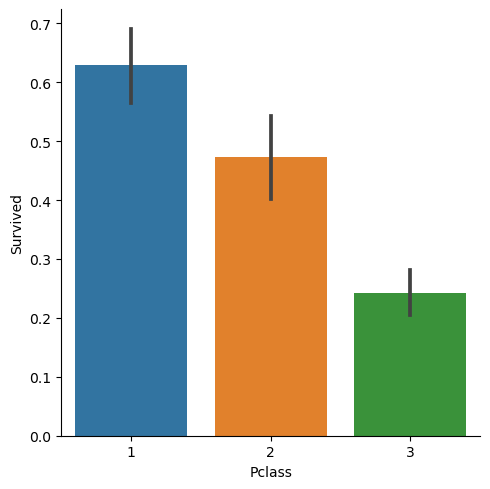

In [6]:
_ = sns.catplot(df, x="Pclass", y="Survived", kind="bar")


- Visualize `Embarked` and `Survived`

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

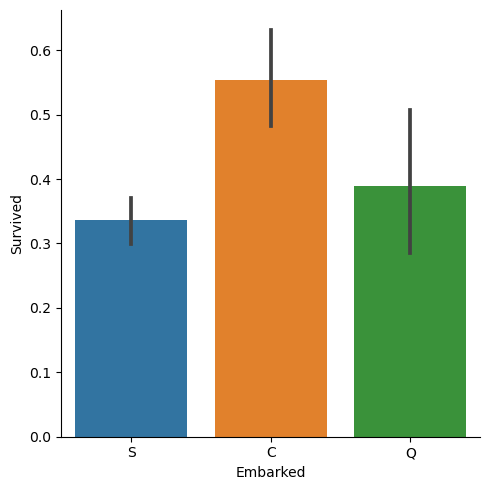

In [7]:
sns.catplot(df, x="Embarked", y="Survived", kind="bar")


- Visualize `Parch` and `Survived`

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


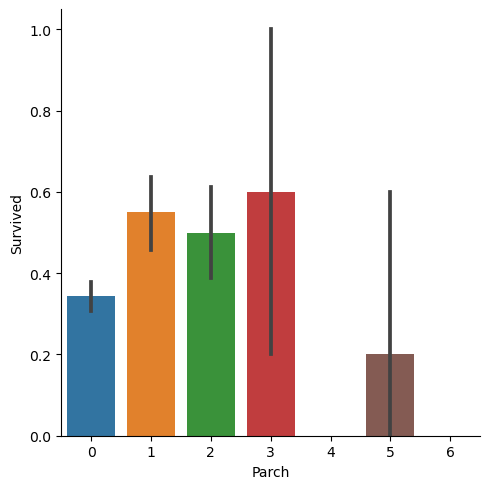

In [8]:
sns.catplot(df, x="Parch", y="Survived", kind="bar")


- Visualize `Fare` and `Survived`

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

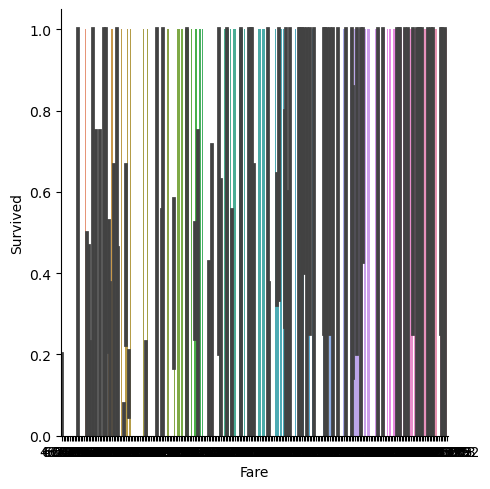

In [9]:
sns.catplot(df, x="Fare", y="Survived", kind="bar")


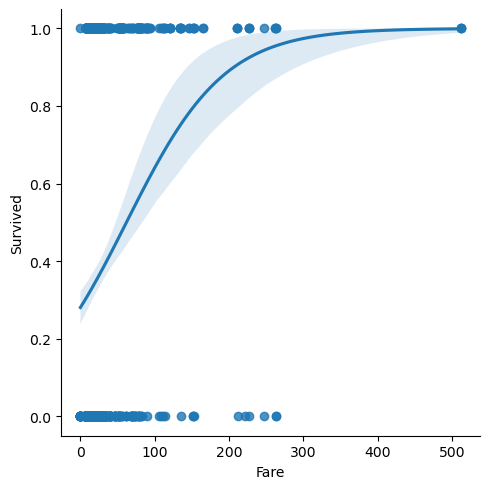

In [10]:
# https://www.tutorialspoint.com/seaborn/seaborn_implot_method.htm#:~:text=lmplot()%20method%20is%20used,a%20dataset%20simple%20and%20convenient.


_ = sns.lmplot(df, x="Fare", y="Survived", logistic=True)

* Show your dataset main statistics

In [11]:
df.describe(include="all")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


Ca veut dire qu'il y a :  
* 2 NaN dans Embarked (voir 889 vs 891)
* 177 NaN dans Age (voir 714 vs 891)

On affiche les lignes où il y a des Nan dans les colonnes Embarked et Age : 

In [12]:
print(df[df['Embarked'].isna()])
print()
print(df[df['Age'].isna()])

     Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked
61          1       1  female  38.0      0      0  80.0      NaN
829         1       1  female  62.0      0      0  80.0      NaN

     Survived  Pclass     Sex  Age  SibSp  Parch     Fare Embarked
5           0       3    male  NaN      0      0   8.4583        Q
17          1       2    male  NaN      0      0  13.0000        S
19          1       3  female  NaN      0      0   7.2250        C
26          0       3    male  NaN      0      0   7.2250        C
28          1       3  female  NaN      0      0   7.8792        Q
..        ...     ...     ...  ...    ...    ...      ...      ...
859         0       3    male  NaN      0      0   7.2292        C
863         0       3  female  NaN      8      2  69.5500        S
868         0       3    male  NaN      0      0   9.5000        S
878         0       3    male  NaN      0      0   7.8958        S
888         0       3  female  NaN      1      2  23.4500        S


- Let's take a look to missing values

In [13]:
df.isna().sum() / len(df) * 100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

## Step 3 - Preprocessing 🍳

- Split your dataset by $X$ and $y$

In [14]:
# Survived	
# Pclass	Sex	Age	SibSp	Parch	Fare	Embarked

features_list = ['Pclass', 'Sex', 'Age', "SibSp", "Parch", "Fare", "Embarked"]           
X = df.loc[:,features_list]                                    
y = df.loc[:,"Survived"]    

# On pourrait faire plus simple pour X avec un drop de la colonne "Survived"


- Split your data in train and test sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=y) # Allows you to stratify your sample. 
                                                                # Meaning, you will have the same
                                                                # proportion of categories in test 
                                                                # and train set

In [16]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
502,3,female,NaN,0,0,7.6292,Q
464,3,male,NaN,0,0,8.0500,S
198,3,female,NaN,0,0,7.7500,Q
765,1,female,51.0,1,0,77.9583,S
421,3,male,21.0,0,0,7.7333,Q


* Deal with missing values 
    * you can replace missing values in numerical columns by the median 
    * you can replace missing values in categorical columns by a new category called "*Unknown*"
    * Check out [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer) documentation to do so 😉

In [17]:
X_train.isnull().any()

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [18]:
# Copy X_train to avoid caveats
#X_train = X_train.copy() # utile en 2023 ?

# Create an imputer for numerical columns 
numerical_imputer = SimpleImputer(strategy="median")

# Apply it on "Age" column. 
# ! Voir le X[["Age"]] afin d'obtnir un 2D array au lieu de 1D
X_train[["Age"]] = numerical_imputer.fit_transform(X_train[["Age"]])

# Danas la colonne Embarked on remplace les valeurs manquantes par une catégorie "Unknown"
categorical_imputer = SimpleImputer(strategy="constant", fill_value="Unknown") 
X_train[["Embarked"]] = categorical_imputer.fit_transform(X_train[["Embarked"]])


In [19]:
X_train.isnull().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

- Make all the required preprocessings on the train set

In [20]:
print(X_train.head())

# Rappel : ['Pclass', 'Sex', 'Age', "SibSp", "Parch", "Fare", "Embarked"]  
numeric_features = [0, 2, 3, 4, 5] 
numeric_transformer = StandardScaler()

categorical_features = [1, 6] 
# categorical_transformer = OneHotEncoder()
# Pas de changement sur le score avec ou sans drop=first
# TODO : Je pense que c'est mieux sans => Refaire le feature importance
categorical_transformer = OneHotEncoder(drop="first")


# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print(X_train[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)

     Pclass     Sex   Age  SibSp  Parch     Fare Embarked
502       3  female  28.0      0      0   7.6292        Q
464       3    male  28.0      0      0   8.0500        S
198       3  female  28.0      0      0   7.7500        Q
765       1  female  51.0      1      0  77.9583        S
421       3    male  21.0      0      0   7.7333        Q
[[ 0.          1.          0.          0.          0.8342464  -0.09099558
  -0.48693486 -0.46765914 -0.48206053]
 [ 1.          0.          1.          0.          0.8342464  -0.09099558
  -0.48693486 -0.46765914 -0.47408512]
 [ 0.          1.          0.          0.          0.8342464  -0.09099558
  -0.48693486 -0.46765914 -0.47977101]
 [ 0.          0.          1.          0.         -1.56084809  1.70021457
   0.45774531 -0.46765914  0.85088482]
 [ 1.          1.          0.          0.          0.8342464  -0.63614649
  -0.48693486 -0.46765914 -0.48008752]]


## Build your model

- Create your Logistic Regression model

In [21]:
classifier = LogisticRegression(random_state = 0) # Instanciate model 
classifier.fit(X_train, y_train)                  # Fit model. Ajustement 


LogisticRegression(random_state=0)

In [22]:
y_train_pred = classifier.predict(X_train)
print(y_train_pred[0:5])

[1 0 1 1 0]


- Evaluate it (don't forget to preprocess X_test)

In [23]:
X_test[["Age"]] = numerical_imputer.fit_transform(X_test[["Age"]])
X_test[["Embarked"]] = categorical_imputer.fit_transform(X_test[["Embarked"]])

X_test = feature_encoder.transform(X_test)

y_test_pred = classifier.predict(X_test)
print(y_test_pred[0:5])


[0 0 0 0 1]


- Look at your model scores on train and test

In [24]:
print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))


0.8061797752808989
0.7821229050279329


- What can you say about it ?

- Create the confusion matrix with `plot_confusion_matrix`

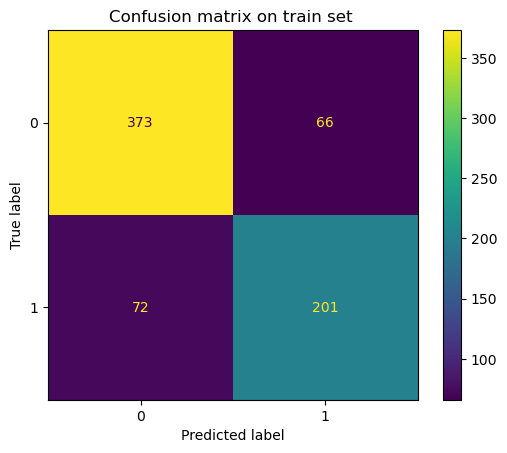

Accuracy-score on train set : 0.806


In [25]:
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train set ") 
plt.show() 
print(f"Accuracy-score on train set : {classifier.score(X_train, y_train):.3f}")

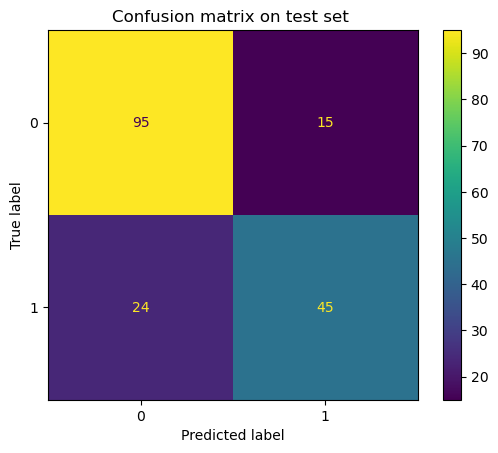

Accuracy-score on test set : 0.782


In [26]:
cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cm_display.ax_.set_title("Confusion matrix on test set ") 
plt.show() 
print(f"Accuracy-score on test set : {classifier.score(X_test, y_test):.3f}")

- Create a dataframe with features importance

## Bonus - Feature Importance 🏄‍♂️

* Now harder, try to visualize the coefficients of your model and therefore deduce a feature importance ranking

In [27]:
#all_column_names = X.columns
categorical_column_names = feature_encoder.transformers_[0][1].categories_
flat_cat_features = np.append(categorical_column_names[0], categorical_column_names[1])
numerical_column_names = X.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
all_column_names = np.append(flat_cat_features, numerical_column_names)
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients" : classifier.coef_.squeeze() # CAREFUL HERE. We need to access first index of our list because 
                                                # Data needs to be 1 dimensional
                                                # That's what .squeeze() is for
})
print(feature_importance)
print("Constant is                    : ", classifier.intercept_)


ValueError: All arrays must be of the same length

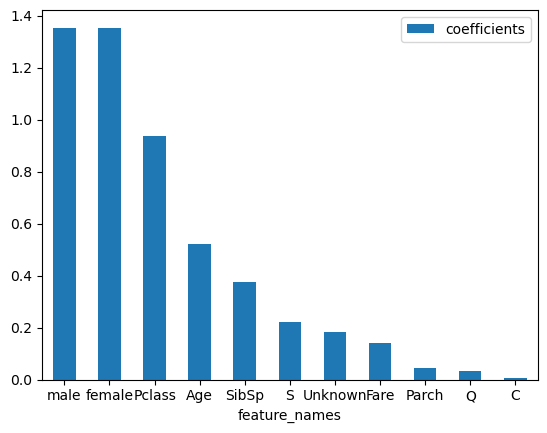

In [ ]:
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

_ = feature_importance.sort_values(by="coefficients", ascending=False).plot(kind="bar", x="feature_names")
_ = plt.xticks(rotation=0)